# Dhruvi Nerkar 916396069

Random user data inserted into Redis: [{'gender': 'female', 'name': {'title': 'Miss', 'first': 'Avery', 'last': 'Hamilton'}, 'location': {'street': {'number': 851, 'name': 'Park Avenue'}, 'city': 'Aberdeen', 'state': 'Cambridgeshire', 'country': 'United Kingdom', 'postcode': 'R9X 2QW', 'coordinates': {'latitude': '-7.5811', 'longitude': '63.7332'}, 'timezone': {'offset': '-3:30', 'description': 'Newfoundland'}}, 'email': 'avery.hamilton@example.com', 'login': {'uuid': '25241901-9fe4-4495-8808-b43470fc6a00', 'username': 'orangepeacock366', 'password': '336699', 'salt': '83qsMvGI', 'md5': 'f4c6b6a145258f5b96e6c0776235cbb8', 'sha1': '55c842a5f56cf25a6fb82f82b45d9f44314fafdd', 'sha256': 'e3334decef7533b882ab4bcff73512dfbe807f593656c4c380b826c205af4c7b'}, 'dob': {'date': '1958-07-29T18:46:26.586Z', 'age': 65}, 'registered': {'date': '2007-05-10T10:48:59.741Z', 'age': 16}, 'phone': '0111471 680 8205', 'cell': '07451 783029', 'id': {'name': 'NINO', 'value': 'WA 35 59 62 V'}, 'picture': {'larg

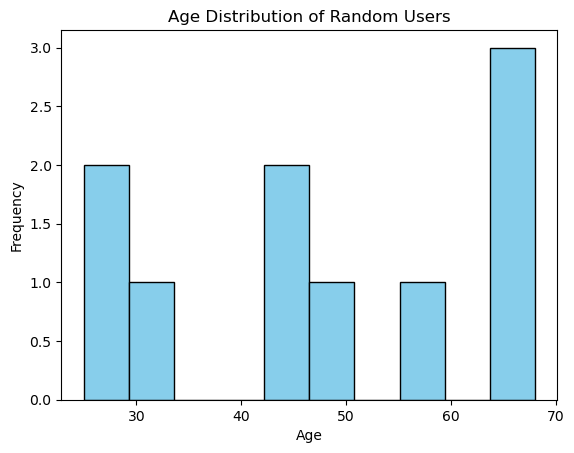

Aggregated User Counts by Gender: {'male': 6, 'female': 4}
Search Results for 'John': []


In [21]:
import requests
import redis
import json
import matplotlib.pyplot as plt

def fetch_random_user_data(results=10):
    url = f"https://randomuser.me/api/?results={results}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()['results']
    else:
        print("Failed to fetch random user data:", response.status_code)
        return None

def insert_json_into_redis(json_data, redis_client, key):
    serialized_data = json.dumps(json_data)
    redis_client.set(key, serialized_data)

def age_distribution_chart(random_user_data):
    ages = [user['dob']['age'] for user in random_user_data]
    plt.hist(ages, bins=10, color='skyblue', edgecolor='black')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Age Distribution of Random Users')
    plt.show()

def aggregate_by_gender(random_user_data):
    gender_counts = {'male': 0, 'female': 0}
    for user in random_user_data:
        gender_counts[user['gender']] += 1
    return gender_counts

def search_by_name(random_user_data, name):
    search_results = []
    for user in random_user_data:
        if name.lower() in f"{user['name']['first']} {user['name']['last']}".lower():
            search_results.append(user)
    return search_results

def main():
    # Connect to your Redis instance
    redis_client = redis.Redis(
        host='redis-13295.c267.us-east-1-4.ec2.cloud.redislabs.com',
        port=13295,
        password='x1rdRgW9dVHP4h1kPW74BkgUApssNo9s',
        db=0
    )
    
    # Fetch random user data from Random User Generator API
    random_user_data = fetch_random_user_data()
    if random_user_data:
        # Insert JSON into Redis
        insert_json_into_redis(random_user_data, redis_client, 'random_user_data')
        print("Random user data inserted into Redis:", random_user_data)
        
        # Display age distribution chart
        age_distribution_chart(random_user_data)
        
        # Aggregate by gender
        gender_counts = aggregate_by_gender(random_user_data)
        print("Aggregated User Counts by Gender:", gender_counts)
        
        # Search for a user by name
        search_name = 'John'  # Change this to the name you want to search for
        search_results = search_by_name(random_user_data, search_name)
        print(f"Search Results for '{search_name}':", search_results)

if __name__ == "__main__":
    main()
